# Week 5: The human experience of sound

<font size="6"> Laboratory 4 </font> <br>
<font size="3"> Last updated Feb. 9, 2023 </font>

## <span style="color:orange;"> 00. Content </span>

<font size="5"> Mathematics </font>
-  converting back and forth between trig and exponential notations
- combining components of the same frequency by factoring
- writing complicated functions using just one term per frequency component
    
<font size="5"> Programming Skills </font>
- N/A
    
<font size="5"> Embedded Systems </font>
- N/A

## <span style="color:orange;"> 0. Required Hardware </span>
- N/A

<h3 style="background-color:lightblue"> Write your name and email below: </h3>

**Name:** Aidan Leib 

**Email:** pleib@purdue.edu

# 1. The human experience of sound

Let's talk about sound. Sound is one of the basic, fundamental ways we experience the world. It can't be broken down into smaller experiences, it can't be explained except by analogy to other feelings. We can explain a bit about what causes sound. By exploring this, we will be able to better understand what makes things sound the same or different. This will also serve to explain why Fourier series are such a powerful tool for understanding sounds.

This may go without saying, but we hear with our ears. To understand sound we need to understand ears a bit. Look at this diagram.

>  Diagram of the middle ear
<img src="Blausen_0330_EarAnatomy_MiddleEar.png" alt="diagram of the middle ear" class="bg-primary mb-1" width="600px">

> <a href="https://commons.wikimedia.org/wiki/File:Blausen_0330_EarAnatomy_MiddleEar.png">BruceBlaus, Blausen.com staff (2014). &quot;Medical gallery of Blausen Medical 2014&quot;. WikiJournal of Medicine 1 (2). DOI:10.15347/wjm/2014.010. ISSN 2002-4436.</a>, <a href="https://creativecommons.org/licenses/by/3.0">CC BY 3.0</a>, via Wikimedia Commons


When the ear drum moves, the auditory ossicles transfer that motion into the cochlea. The ear drum moves when the air pressure in the middle ear is different from the air pressure in the ear canal. The middle ear is filled with air, and connected to the outside through the auditory tube into your nasal cavity. The auditory tube is usually closed, but opens up throughout the day at various times, such as when swallowing. This lets any gradual changes in air pressure balance out, so your middle ear doesn't inflate or deflate like a balloon. This gives us an important insight about what sound is.

**Sound is caused by *changes* in air pressure, not by pressure alone.**

Sound does not allow us to sense air pressure directly. This is one indication of why calculus will be such a helpful tool for understanding sound. Calculus is the mathematics of changes.

Once a motion is transmitted from the ear drum to the cochlea, it wiggles the fluid in the cochlea which in turn wiggles tiny bundles of hair inside the cochlea. When the hairs wiggle, they produce an electrical signal which travels to the brain. Each hair bundle sends its own signal, giving you a unique experience.

To understand this, we will use an analogy with an old style of meter called a vibrating reed frequency meter. Watch this short video of someone using this tool to measure the speed of an engine.

https://www.youtube.com/watch?v=AsSi6FA8wFI

In [1]:
%%html 
<iframe width="560" height="315" src="https://www.youtube.com/embed/AsSi6FA8wFI" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

The device consists of a series of metal reeds which are tuned to vibrate at a specific frequency. In the example above, the reeds which are tuned to vibrate at 51 vibrations per second are moving most strongly, indicating that the motor is turning at 51 cycles per second. The reeds which are tuned to vibrate at 47 vibrations per second do not wiggle as much. The hairs in your cochlea work in much the same way. Depending on the frequency of vibration coming into the cochlea, different hairs will wiggle and you will get a different sensation. This leads us to another important concept.

**Sound is experienced as a collection of *separate* frequencies experienced *simultaneously*.**

That is, we can stimulate specific groups of hairs in the cochlea by making vibrations at specific frequencies. Another important concept is that you can only experience a sound if you have hairs in your cochlea which are sensitive to it. In most people, there are no hairs which are sensitive to vibrations faster than 20,000 vibrations per second. On the other end, most people don't have hairs which are sensitive to vibrations slower than about 20 vibrations per second. The scientific unit for something happening so-many-times-per-second is "Hertz", abbreviated as Hz. That is,

**Sound is only experienced when vibrations occur within a certain range of frequencies. Most people can't hear vibrations slower than 20 Hz or faster than 20,000 Hz. Many people can only hear vibrations between 200 Hz and 4,000 Hz.**

# 2. Multiple sounds, simultaneously

Let's build some sounds and see how we can combine them. We will combine a a middle A with a C and F, to form the F major chord. We will start with five seconds of time, sampled at 44100 hertz.

In [2]:
import numpy as np

t = np.linspace(0, 5, 5*44100)

Recall that middle A has a frequency of 440 Hz, and the notes on the chromatic scale are in a geometric sequence with common ratio $\sqrt[12]{2}$. We will take the C which is three steps above middle A, and the F which is four steps below middle A.

In [3]:
a = np.sin(2*np.pi*440*t)
c = np.sin(2*np.pi*440*2**(3/12)*t)
f = np.sin(2*np.pi*440*2**(-4/12)*t)

Let's plot each of them and give them a listen. Note that in order to keep the `Audio` objects from being automatically deleted, we need to keep a reference to them somewhere.

The note A:


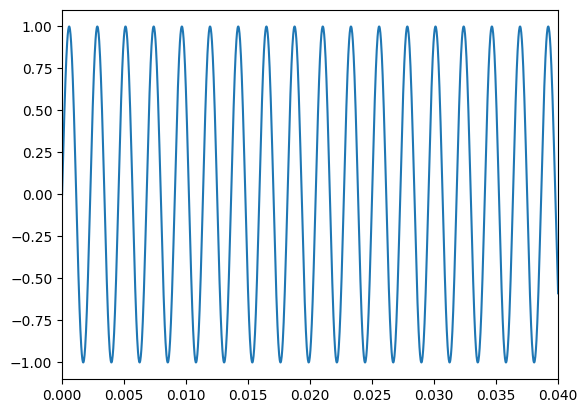

The note C:


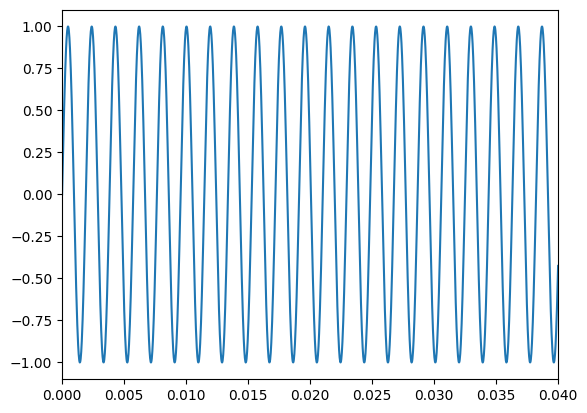

The note F:


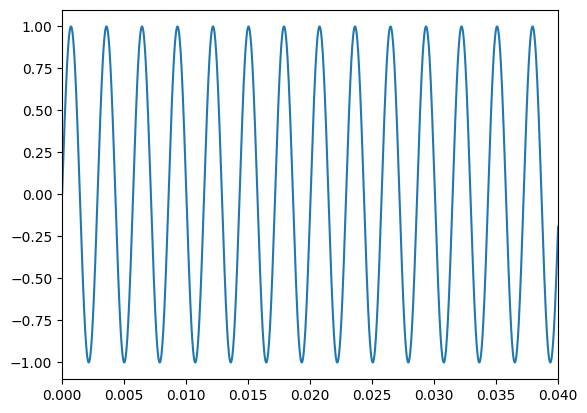

In [4]:
import matplotlib.pyplot as plt
from IPython.display import Audio


audio_playbacks = []
for name, note in [('A', a), ('C', c), ('F', f)]:
    print(f'The note {name}:')
    plt.plot(t, note)
    plt.xlim(0, 0.04)
    plt.show()
    audio = Audio(note, rate=44100)
    audio_playbacks.append(audio)
    display(audio)

To combine them, we can just add up the curves. Let's see that now.

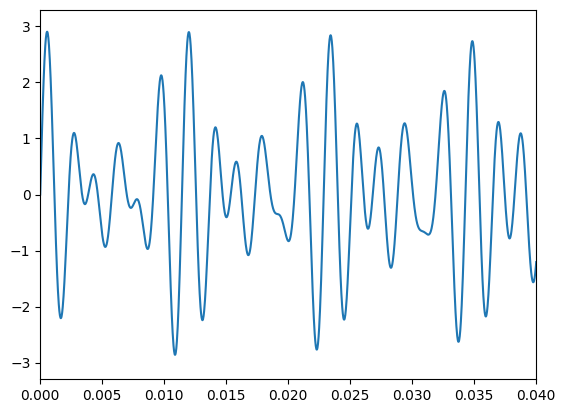

In [5]:
f_major = a + c + f
plt.plot(t, f_major)
plt.xlim(0,0.04)
plt.show()
audio = Audio(f_major, rate=44100)
audio_playbacks.append(audio)
display(audio)

### <span style="color:red"> Exercise 1 </span>

Wikipedia has [a helpful list of the major chords](https://en.wikipedia.org/wiki/Major_chord#Major_chord_table). Pick another chord from the table and write some code to play that chord using sine waves.

In [7]:
b_flat = np.sin(2*np.pi*440*2**(-1/12)*t)
d = np.sin(2*np.pi*440*2**(4/12)*t)

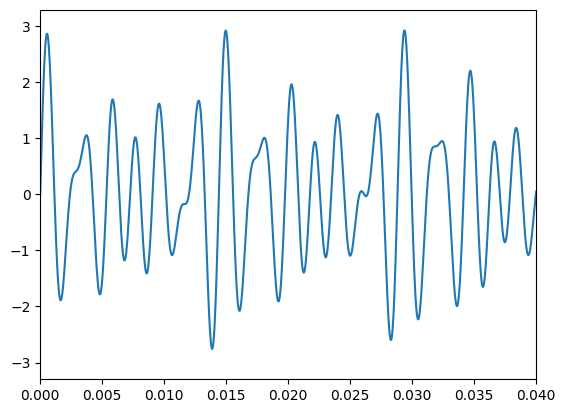

In [8]:
b_flat_major = b_flat + d + f
plt.plot(t, b_flat_major)
plt.xlim(0,0.04)
plt.show()
audio = Audio(b_flat_major, rate=44100)
audio_playbacks.append(audio)
display(audio)

### <span style="color:red"> Exercise 2 </span>

Notice that even though we added the notes above together, the y-coordinate of the curve in the chord is still near zero the whole time. Explain why that is. Why didn't adding the curves up shift the whole plot upward?

I would imagine it's because all the notes are centered around 0, so by adding them all together you'll still get an average amplitude of 0 which doesn't move the wave up or down at all.

### <span style="color:red"> Exercise 3 </span>

Try adding a constant number to the sound curve for one of the sounds we have made. Play the sound back and compare. Does it sound at all different? Describe your experience qualitatively. Then, explain in terms of the anatomy of the ear why these two curves should sound the same.

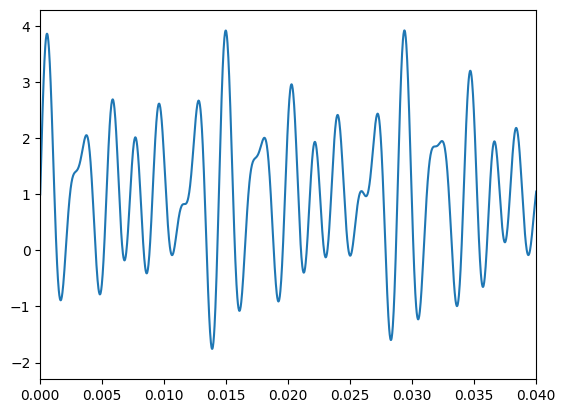

In [16]:
b_flat_major = b_flat + d + f + 1
plt.plot(t, b_flat_major)
plt.xlim(0,0.04)
plt.show()
audio = Audio(b_flat_major, rate=44100)
audio_playbacks.append(audio)
display(audio)

If I add a large constant to the sound wave it makes the overall sound quieter. However if it's a small addition there is no difference in sound. This is because the ear only detects differences in air pressure so by keeping the relative amplitudes the same throughout the wave, the sound should not sound any different when a constant is added to it.

# 3. Phase and waveform

There is another aspect to hearing which is essential. Up to now, we have been using only sine waves to produce sounds. There is a good reason for this, and it lies at the heart of Fourier theory -- over the next several labs, we will explore how we can use sine waves to describe an arbitrary shape of curve. We call the shape of a sound wave its **waveform**.

There are three numbers which characterize a sine wave: its amplitude, frequency, and phase. The amplitude of a sound wave it related to its volume, that is, how loud the sound it. We have already explored how pitch is related to frequency. What about phase? How do we experience this? Let's explore an example. Begin with 5 seconds of time, sampled at the standard 44100 Hz.

In [6]:
t = np.linspace(0, 5, 5*44100)

To avoid having to mess with irrational numbers for now, let's hear A3 which has a frequency of 220 Hz, and combine this with a note at 330 Hz, which is very slightly higher than E3. In music terms, we are using a "perfect fifth" (notes with a frequency ratio of 3:2) rather than an "equal temperament" (where the notes form a geometric progression).

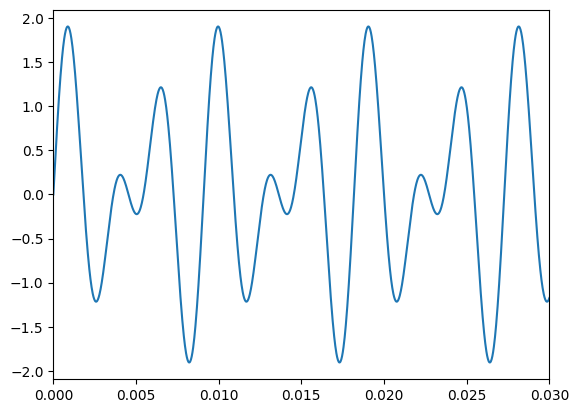

In [17]:
a3 = np.sin(2*np.pi*220*t)
e3 = np.sin(2*np.pi*330*t)

plt.plot(t, a3+e3)
plt.xlim(0, 0.03)
plt.show()
audio = Audio(a3+e3, rate=44100)
audio_playbacks.append(audio)
display(audio)

What if we adjust the phase of the E note? Let's try shifting it by, say, $\pi/4$.

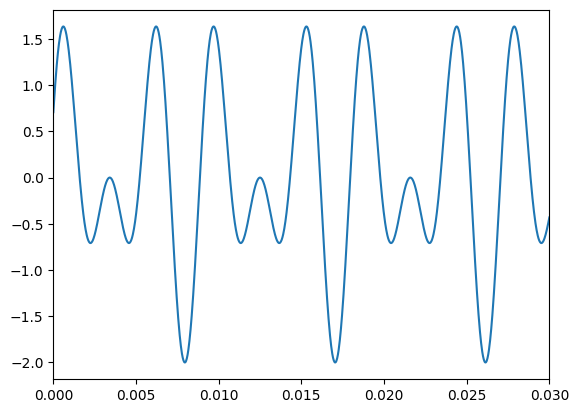

In [18]:
e3_shift = np.sin(2*np.pi*330*t+np.pi/4)

plt.plot(t, a3+e3_shift)
plt.xlim(0, 0.03)
plt.show()
audio = Audio(a3+e3_shift, rate=44100)
audio_playbacks.append(audio)
display(audio)

The curves look visually similar. To the ear, they sound exactly the same. It is a distinct pattern of pressures, we can certainly distinguish the waveforms visually. They are the same sound. This is an important fact.

**We do not experience the phase of a waveform as sound.**

This helps justify why we don't bother with cosine waves when it comes to sound. After all, sine and cosine are related by the identity

$$
\cos(x) = \sin(x+\tfrac{\pi}{2}).
$$

That is, any cosine wave can be expressed as a phase-shifted sine wave.

# 4. Simplifying sine waves

Let's explore how we can take a sound wave which may be expressed in a complicated way, and write it as a simple sum of sine waves with different frequencies. You, me, and two friends are starting a band where we each play the Keytar. Each of us plays a note at the beginning of our performance, given by the following formulas.

\begin{align*}
f_1(t) &= 3\sin(2\pi 220 t)\\
f_2(t) &= -\cos(2\pi 220 t)\\
f_3(t) &= \sin^2(2\pi 220 t)\\
f_4(t) &= 2\sin(2\pi 440 t + \tfrac{\pi}{6})
\end{align*}

We all share an amplifier, and the resulting sound coming from the amplifier is given by the function

\begin{align*}
f(t) &=f_1(t)+f_2(t)+f_3(t)+f_4(t) \\
&= 3\sin(2\pi220t) -\cos(2\pi220t)+\sin^2(2\pi220t)+2\sin(2\pi440t+\pi/6).
\end{align*}

That looks like a mess! Is there a simpler way we can make the same sound? Let's try plotting the curves. We will plot each instrument's sound separately, then combine them.

the waveform of f1(t):


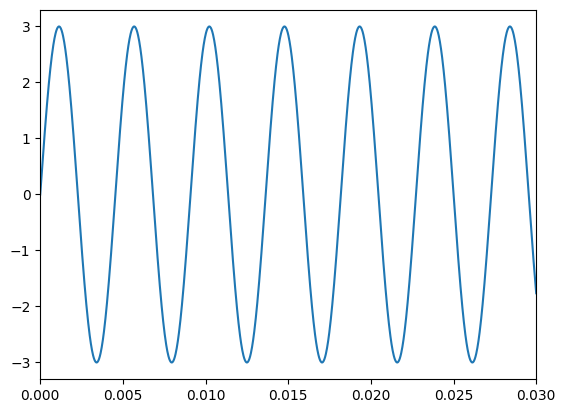

the waveform of f2(t):


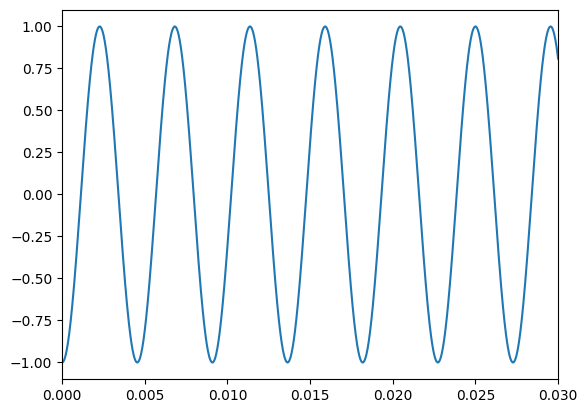

the waveform of f3(t):


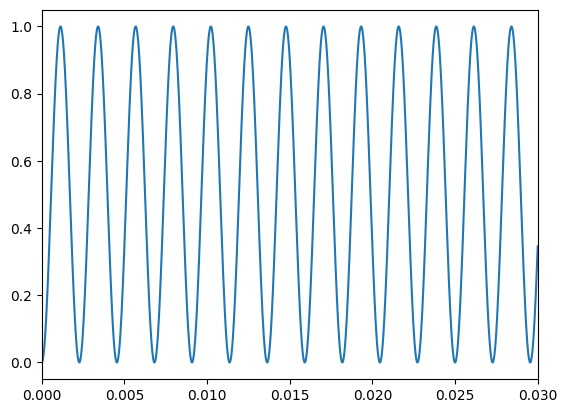

the waveform of f4(t):


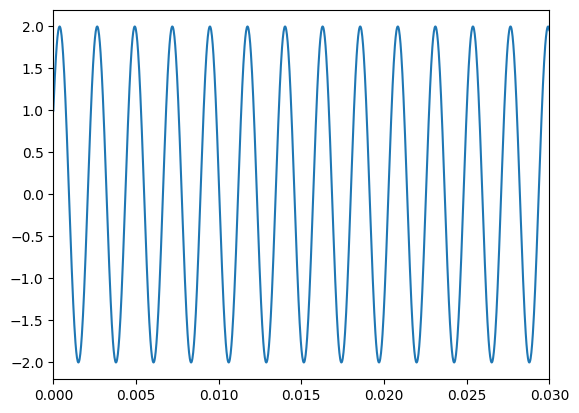

the combined waveform:


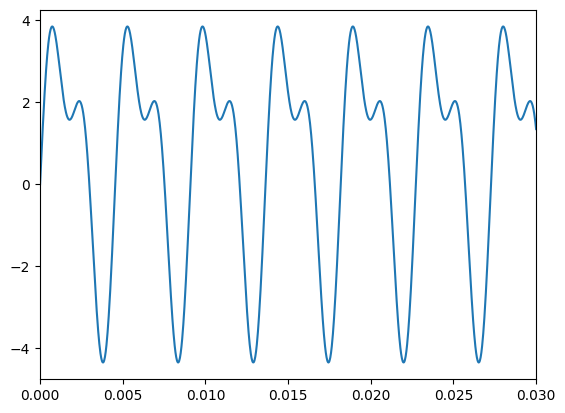

In [19]:
t = np.linspace(0, 5, 5*44100)

funcs = [
    3*np.sin(2*np.pi*220*t),
    -np.cos(2*np.pi*220*t),
    np.sin(2*np.pi*220*t)**2,
    2 * np.sin(2*np.pi*440*t+np.pi/6),
]

f = sum(funcs)

for name, func in enumerate(funcs, start=1):
    print(f'the waveform of f{name}(t):')
    plt.plot(t, func)
    plt.xlim(0, 0.03)
    plt.show()

print('the combined waveform:')
plt.plot(t, f)
plt.xlim(0, 0.03)
plt.show()

Plotting it gives us two insights:
 - even though it has four parts to it, the resulting waveform is pretty simple.
 - $f_1$ and $f_2$ both look like they have the same frequency, and $f_3$ and $f_4$ look like they share a frequency as well.
It looks like we should be able to make this sound using just two sine waves. Let's define a couple new functions,

\begin{align*}
g_1(t)&=f_1(t)+f_2(t)\\
&=3\sin(2\pi220t) -\cos(2\pi220t)\\
g_2(t)&=f_3(t)+f_4(t)\\
&=\sin^2(2\pi220t)+2\sin(2\pi440t+\pi/6).
\end{align*}

What do these look like? Is there a simpler way to write them?

the plot of g1(t):


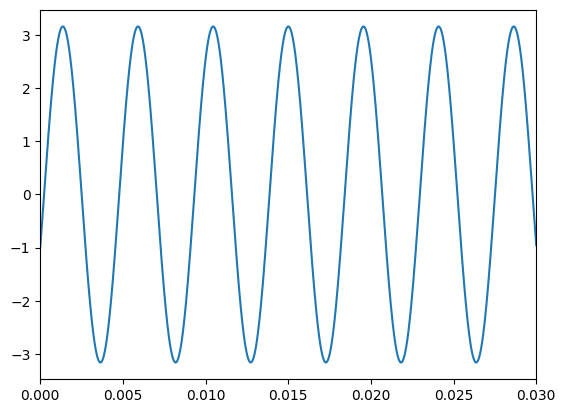

the plot of g2(t):


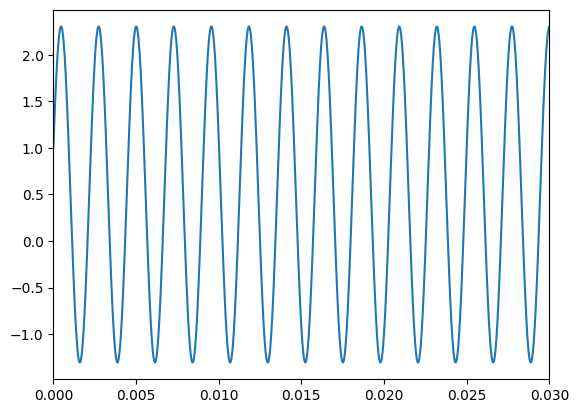

In [20]:
print('the plot of g1(t):')
plt.plot(t, funcs[0]+funcs[1])
plt.xlim(0, 0.03)
plt.show()

print('the plot of g2(t):')
plt.plot(t, funcs[2]+funcs[3])
plt.xlim(0, 0.03)
plt.show()

Sure enough,  those look like pure sine waves! Can we figure out their formulas? This is not too bad with complex numbers. This is part of a general rule:

**trigonometric problems are almost always easier with complex numbers.**

Remember Euler's identity, 

$$
e^{ix}=\cos(x)+i\sin(x).
$$

It follows that 
\begin{align*}
\sin(x)&=\Im(e^{ix})\\
\cos(x)&=\Re(e^{ix}).
\end{align*}
This lets us rewrite $g_1$ using simple factoring.

\begin{align*}
g_1(t)
&= 3\sin(2\pi220t) -\cos(2\pi220t)\\
&= 3\Im(e^{2\pi i 220 t})-\Re(e^{2\pi i 220 t})\\
&= 3\Im(e^{2\pi i 220 t})-\Im(i e^{2\pi i 220 t})\\
&= \Im(3 e^{2\pi i 220 t}-i e^{2\pi i 220 t})\\
&= \Im((3-i) e^{2\pi i 220 t})
\end{align*}
Now we can just put $3-i$ in polar form, $3-i=\sqrt{10}e^{-i\arctan(1/3)}$. That lets us factor,

\begin{align*}
g_1(t)
&= \Im((3-i) e^{2\pi i 220 t})\\
&= \sqrt{10}\Im( e^{2\pi i 220 t-i\arctan(1/3)})\\
&= \sqrt{10} \sin(2\pi 220 t-\arctan(1/3)).
\end{align*}

There we go! $g_1$ is just an ordinary sine function with amplitude $\sqrt{10}$ and phase $-\arctan(1/3)$.

### <span style="color:red"> Exercise 4 </span>
We could have written $g_1$ in terms of two sine functions, $g_1=3\sin(220\pi t)-\sin(220\pi t+\pi/2)$. In about two sentences, give an informal explanation of why you can't just add the amplitudes of the sine functions to get a sine function with amplitude 2.
    
    

Because the sine functions have a different phase, their amplitudes cannot be simply added together because they will be different values at different times. The second term can even be written as a $cos()$ which we know cannot be added to a sine in that manner

### <span style="color:red"> Exercise 5  </span>
Show that $3-i=\sqrt{10}e^{-i\arctan(1/3)}$.

    

$$e^{ix} = cos(x) + isin(x)$$
$$\sqrt{10}e^{-i * arctan(1/3)} = \sqrt{10}(cos(arctan(1/3) - i * sin(arctan(1/3))$$
$$\sqrt{10}e^{-i * arctan(1/3)} = \sqrt{10}\left(\frac{1}{\sqrt{1 + \frac{1}{3}^2}} - i * \frac{\frac{1}{3}}{\sqrt{1 + \frac{1}{3}^2}}\right)$$

$$\sqrt{10}e^{-i * arctan(1/3)} = \sqrt{10} \left( \frac{1}{\frac{\sqrt{10}}{3}} - i * \frac{1/3}{\frac{\sqrt{10}}{3}} \right)$$
$$\sqrt{10}e^{-i * arctan(1/3)} = \sqrt{10}\frac{3}{\sqrt{10}} - i * \sqrt{10} * \frac{1}{3} * \frac{3}{\sqrt{10}}$$
$$\sqrt{10}e^{-i * arctan(1/3)} = 3 - i$$

To do the same with $g_2$, we will find it handy to have the following identity for complex numbers.

$$
\Im(x)^2 = \frac{1}{2}\left( |x|^2 - \Re(x^2) \right).
$$

### <span style="color:red"> Exercise 6 </span>
    
Using the identities $\Re(x)=\frac{x+\overline{x}}{2}$, $\Im(x)=\frac{x-\overline{x}}{2i}$, and $x\overline{x}=|x|^2$, prove the above identity.

$$\Im{(x)}^2 = \left( \frac{x - \overline{x}}{2i} \right)^2$$
$$ = \frac{x^2 - 2x\overline{x} + \overline{x}^2}{-4}$$
using $x\overline{x} = |x|^2$,
$$ = \frac{x^2 - 2|x|^2 + \bar{x}^2}{-4}$$
$$ = \frac{1}{2} \left( |x|^2 + \frac{x^2 + \overline{x}^2}{-2} \right)$$
$$ = \frac{1}{2} \left( |x|^2 - \Re{(x^2)} \right)$$

Using this the computation will be a breeze.

$$ \begin{align*}
g_2(t)
&= \sin^2(2\pi 220t)+2\sin(2\pi440t+\pi/6)\\
&= \Im(e^{2\pi i 220t})^2+2\Im(e^{2\pi i 440 t +\pi i/6})\\
&= \frac{1}{2}\left|e^{2\pi i 220 t} \right|^2 - \frac{1}{2}\Re(e^{2\pi i 440t})+2\Im(e^{2\pi i 440 t +\pi i/6})\\
&= \frac{1}{2} - \frac{1}{2}\Im(ie^{2\pi i 440t}) +2\Im(e^{2\pi i 440 t +\pi i/6})\\
&= \frac{1}{2} + \Im\left( \left(-\frac{i}{2} +2e^{i\pi/6}\right) e^{2\pi i 440 t}\right)
\end{align*} $$

Once again we put the leading coefficient into polar form,

$$
-\frac{i}{2}+2e^{i\pi/6}=\frac{\sqrt{13}}{2}e^{i\arctan(1/2\sqrt{3})}
$$

which allows us to complete our task.

$$\begin{align*}
g_2(t)
&=\frac{1}{2} + \Im\left( \left(-\frac{i}{2} +2e^{i\pi/6}\right) e^{2\pi i 440 t}\right)\\
&=\frac{1}{2} + \frac{\sqrt{13}}{2}\Im(e^{2\pi i 440 t+\arctan(1/2\sqrt{3})})\\
&=\frac{1}{2} + \frac{\sqrt{13}}{2}\sin\left(2\pi 440 t+\arctan\left(1/2\sqrt{3}\right)\right).
\end{align*} $$

This gives us an alternate form for $f$,

$$ \begin{align*}
f(t) 
&= g_1(t)+g_2(t)\\
&= \sqrt{10} \sin(2\pi 220 t-\arctan(1/3)) +\frac{1}{2} + \frac{\sqrt{13}}{2}\sin\left(2\pi 440 t+\arctan\left(1/2\sqrt{3}\right)\right)
\end{align*} $$

Just to check our work, let's try plotting these forms side-by-side.

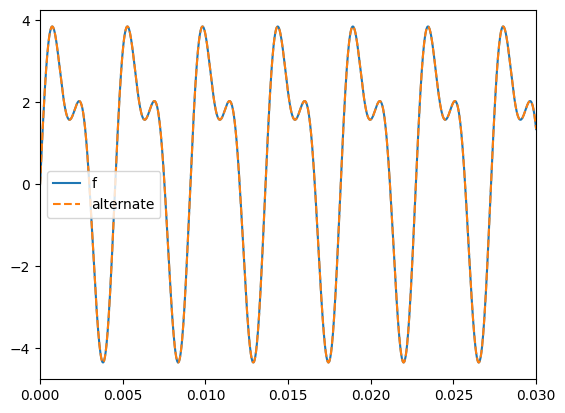

In [21]:
alternate_form = np.sqrt(10)*np.sin(2*np.pi*220*t - np.arctan(1/3)) +1/2 +np.sqrt(13)/2*np.sin(2*np.pi *440 * t + np.arctan(1/np.sqrt(3)/2))

plt.plot(t, f, label='f')
plt.plot(t, alternate_form, label='alternate', linestyle='--')
plt.xlim(0, 0.03)
plt.legend()
plt.show()

They agree exactly, as promised. What's more, since we know that sound is not affected by phase or by a constant shift, we can get a much simpler waveform which sounds the same by dropping those parts.

$$
g(t) = \sqrt{10} \sin(2\pi 220 t) + \frac{\sqrt{13}}{2}\sin\left(2\pi 440 t\right)
$$

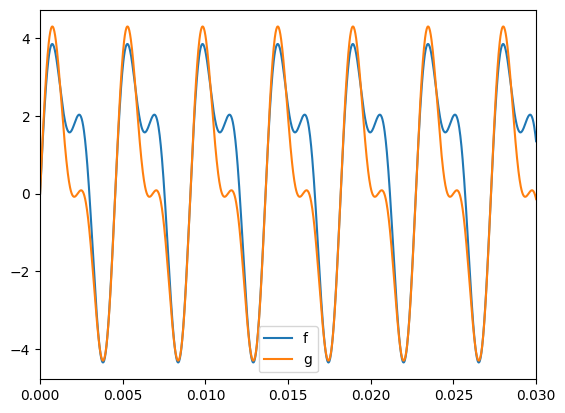

f:


g:


In [22]:
g =  np.sqrt(10)*np.sin(2*np.pi*220*t) + np.sqrt(13)/2*np.sin(2*np.pi *440 * t)

plt.plot(t, f, label='f')
plt.plot(t, g, label='g')
plt.xlim(0, 0.03)
plt.legend()
plt.show()

print('f:')
audio = Audio(f, rate=44100)
audio_playbacks.append(audio)
display(audio)
print('g:')
audio = Audio(g, rate=44100)
audio_playbacks.append(audio)
display(audio)


Now we can make the same sound with just two keytars, freeing up one band member to learn the harmonica and another to learn the tambourine.

### <span style="color:red"> Exercise 7 </span>

Use an approach like the above to rewrite the function 

$$
f(t) = 2 \sin(2\pi 440 t) - 5\sin(2\pi 440 t+3 \pi/4) 
$$

as one sine function.

$$f(t) = -2(\Im(e^{i2\pi440t}) + 5(\Im(e^{i2\pi440t + i3\pi/4}))$$
$$ = \Im(e^{i2\pi440t} + 5e^{i2\pi440t + i3\pi/4})$$
$$ = \Im(-2e^{i2\pi440t} + 5e^{i2\pi440t}e^{i3\pi/4})$$
$$ = \Im(e^{i2\pi440t}) (2 - 5e^{i3\pi/4}$$
$$ = 2\sin(2\pi440t)(2 + \frac{5\sqrt{2}}{2} - i\frac{5\sqrt{2}}{2})$$
$$ = 86.2\sin(2\pi440t)e^{i\arctan \left( \frac{5\sqrt{2}}{4 + 5\sqrt{2}} \right) }$$

### <span style="color:red"> Exercise 8 </span>

In a short paragraph, explain a procedure you can use to figure out the phase and amplitude of a signal composed of two sine functions of the same frequency.

First I would convert the trigonometric representations of the signals into their Euler counterparts. This would allow me to manipulate and factor out the frequency term. Then all I would have to do is convert the remaining term into a new amplitude and phase multiplied by the orignal frequency. From here you could convert everything back into a trigonometric representation.

### <span style="color:red"> Exercise 9 </span>

Reflect on the section above. Why would you want to rewrite a sum of sine functions as fewer, combined sine functions?

One reason you would want to rewrite a collection of sine waves would be to save space on the signal band and or in memory. By taking out duplicated data points you are able to save on data and make a more efficient signal.

### <span style="color:red"> Exercise 10 </span>

We showed how to rewrite a function using sine functions. Explain how we could do a similar procedure, using cosines instead. What would be different, what would stay the same?

I believe you could do the very same thing with cosine waves, you would just be using the real part of Euler's formula in this case instead of the imaginary side. You may also have to keep in mind that cosine waves are phased 90 degrees from sine waves.